# The secret to more favorable rates on loans 
## by Vasileios Garyfallos

## Investigation Overview

In this investigation, I explored how indicators of financial health could impact the interest rate offered by investors on a prospective loan. In particular, I examined employment, homeownership, credit, and income. My goal was to answer the question: how can I receive a better rate on my loan? Read on to find out! 

## Dataset Overview

For this project I selected a dataset from Prosper Loan, a California-based FinTech which facilitates peer-to-peer loans. Prospective borrowers request personal loans through Prosper, with individual or institutional investors choosing who to fund. The loans, worth anywhere from 2,000 to 40,000, USD are distributed through Prosper. Prosper also collects and allocates payments and interests from borrowers to lenders. Investors make lending decisions based on a borrower's credit score, rating, and history, as well as the category of the loan ([source](https://en.wikipedia.org/wiki/Prosper_Marketplace)). As someone also working in the FinTech industry, in mobile banking, I am excited to learn more about a different aspect of the sector. 

The dataset itself was provided through Udacity's Data Analyst Nanodegree program, but similar historical data can also be obtained directly through Prosper via an API, as long as the requester has a valid Prosper account ([source](https://prosper.zendesk.com/hc/en-us/articles/210013083-Where-can-I-download-Prosper-loan-data-)). Documentation for the dataset is available through [Udacity](https://docs.google.com/spreadsheets/d/1gDyi_L4UvIrLTEC6Wri5nbaMmkGmLQBk-Yx3z0XDEtI/edit#gid=0) or [Prosper](https://www.prosper.com/Downloads/Services/Documentation/ProsperDataExport_Details.html). It originally contained 113,937 rows and 81 columns. It provides a variety of information pertaining to Prosper's loan applicants and the loans themselves. I focused primarily on relevant information about the borrower's financial health. 

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from textwrap import wrap

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
borrower = pd.read_csv(r'borrower_info.csv')

## Tip 1: Earn more money 

While it probably comes as no surprise, applicants with higher incomes enjoy lower rates than applicants with lower incomes. A borrower earning over 100,000 USD will on average receive a rate that is 0.05 percent lower than a borrower earning anywhere from 25,000 to 49,999 USD. And although a good credit score has a stronger direct relationship to borrower rates than income, higher incomes can still help strengthen this relationship and lower rates by even more. Unfortunately, this is only true for applicants earning 50,000 USD or more.  

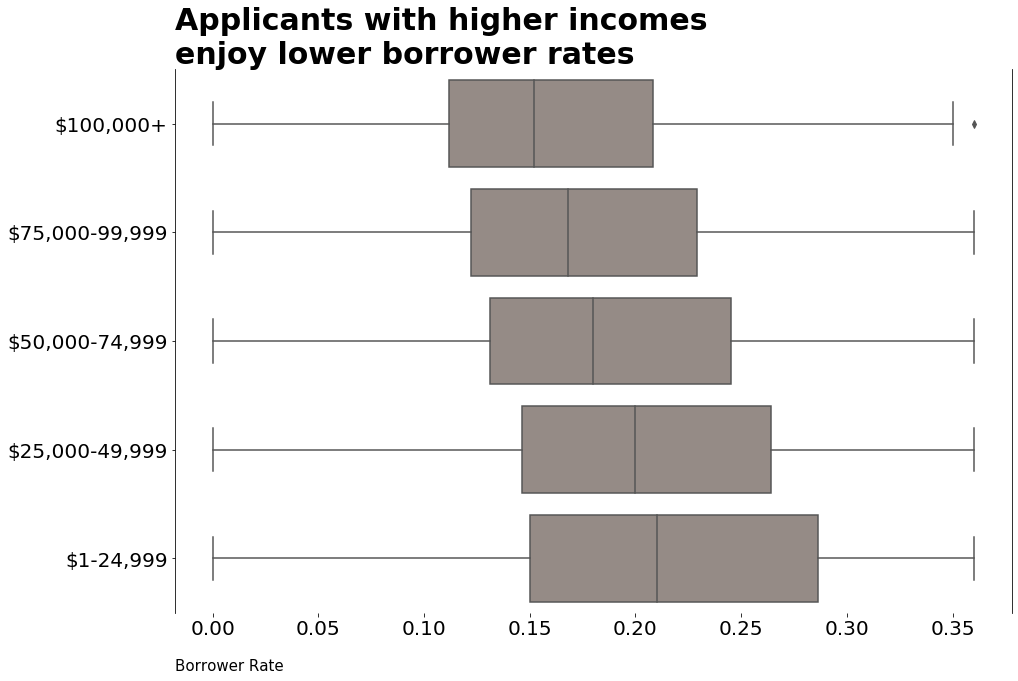

In [140]:
# set plot color palette
col_list = ["warm grey", "gunmetal", "dusky blue","cool blue", "deep teal","viridian", "twilight blue"]
col_list_palette = sns.xkcd_palette(col_list)
sns.set_palette(col_list_palette) 
base_color = sns.color_palette()[0]

# select font
matplotlib.rcParams['font.family'] = "sans-serif"

# set legend fontsize
plt.rcParams['legend.title_fontsize'] = '15'

# set order 
inc = ['$100,000+', '$75,000-99,999', '$50,000-74,999', '$25,000-49,999', '$1-24,999']

# set size 
plt.figure(figsize=(15,10));

# plot 
ax = sns.boxplot(data = borrower, x = 'BorrowerRate', y = 'IncomeRange', color = base_color, order = inc);

# set plot attributes 
plt.title("Applicants with higher incomes\n%s" % "\n".join(wrap("enjoy lower borrower rates", width=60)),
         fontsize = 30, loc = 'left', weight = 'bold', x = 0) 
plt.ylabel("")
plt.xlabel("Borrower Rate", fontsize = 15, horizontalalignment = 'left', x=0, labelpad = 20)
ax.yaxis.set_label_coords(-0.1,.78)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

# remove axes 
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# make transparent 
ax.patch.set_alpha(0.0)

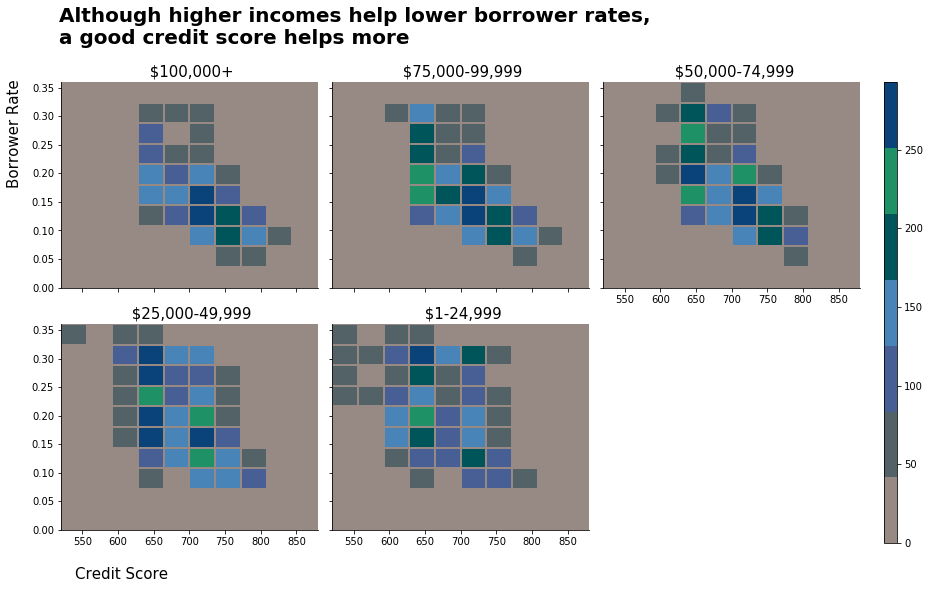

In [131]:
# special thanks to Claire Duvallet, whose blog post helped me adjust seaborn's FacetGrid attributes
# blog post: https://cduvallet.github.io/posts/2018/11/facetgrid-ylabel-access

# set order 
inc = ['$100,000+', '$75,000-99,999', '$50,000-74,999', '$25,000-49,999', '$1-24,999']

# specify color palette
my_cmap = ListedColormap(sns.color_palette().as_hex())

# plot
ax = sns.FacetGrid(data = borrower, col = 'IncomeRange', col_wrap = 3, size = 4,
                margin_titles = True, col_order = inc)
ax.map(plt.hist2d, 'CreditScoreRangeLower', 'BorrowerRate', cmap = my_cmap); 

# set plot attributes 
plt.subplots_adjust(top=.85)
ax.fig.suptitle("Although higher incomes help lower borrower rates,\n%s" % "\n".join(wrap("a good credit score helps more", width=60)), 
                fontsize = 20, horizontalalignment = 'left', weight = 'bold', x=.06) 

for a in ax.axes.flat:
    a.set_xlabel("")
    a.set_ylabel("")
    if a.get_title():
        a.set_title(a.get_title().split('=')[1],
                     fontsize='15')
    
plt.ylabel("Borrower Rate", fontsize = 15, verticalalignment = 'top', y = 1.93, labelpad = 325)
plt.xlabel("Credit Score", fontsize = 15, horizontalalignment = 'left', x=-1, labelpad = 20)
    
cbar_ax = ax.fig.add_axes([1.015, 0.05, 0.015, 0.8])
plt.colorbar(cax=cbar_ax);

## Tip 2: Own a home 

After the so-called Great Recession, homeownership rates within the United States fell throughout the next decade. In comparison to previous generations, Millenials like myself are less likely to own homes ([source](https://www.urban.org/sites/default/files/publication/98729/millennial_homeownership_0.pdf)). There have been many conversations around whether or not this trend is problematic ([source](https://www.nytimes.com/roomfordebate/2016/08/02/homeownership-at-50-year-low-so-what)). While the debate may be ongoing, it is clear that owning a home does help loan applicants receive an average of 0.01 - 0.02 percent lower rates - no matter your income level. But a non-homeowner earning a higher income will still receive, on average, a lower rate than a homeowner earning less.  

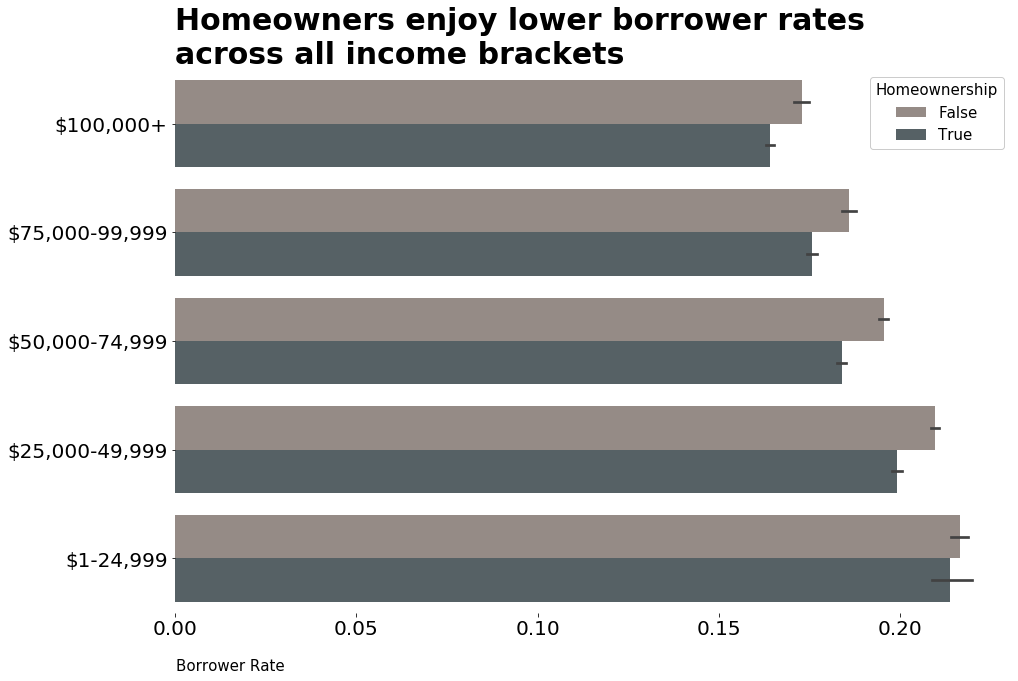

In [141]:
# set size 
fig, ax = plt.subplots(figsize=(15, 10))

# plot
ax = sns.barplot(data = borrower, x = 'BorrowerRate', y = 'IncomeRange', hue = 'IsBorrowerHomeowner', 
                 order = inc, ax = ax) 

# set plot attributes 
plt.title("Homeowners enjoy lower borrower rates\n%s" % "\n".join(wrap("across all income brackets", width=60)),
         fontsize = 30, loc = 'left', weight = 'bold') 
plt.ylabel("")
plt.xlabel("Borrower Rate", fontsize = 15, horizontalalignment = 'left', x=.001, labelpad = 20)
ax.yaxis.set_label_coords(-0.1,.78)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.legend(loc = 1, ncol = 1, framealpha = 1, title = 'Homeownership', fontsize=15)

# remove axes 
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False);

# make transparent 
ax.patch.set_alpha(0.0)

## Tip 3: Open up more lines of credit (...sometimes)

Like income, lines of credit can help enhance the existing negative relationship between a high credit score and a high borrower rate. If someone already has a high credit score, opening up additional lines of credit may encourage investors to offer even lower interest rates than someone with a similar credit score but less lines of credit. There is no direct relationship between lines of credit and borrower rates, however - so lines of credit alone aren't guaranteed to improve borrower rates. 

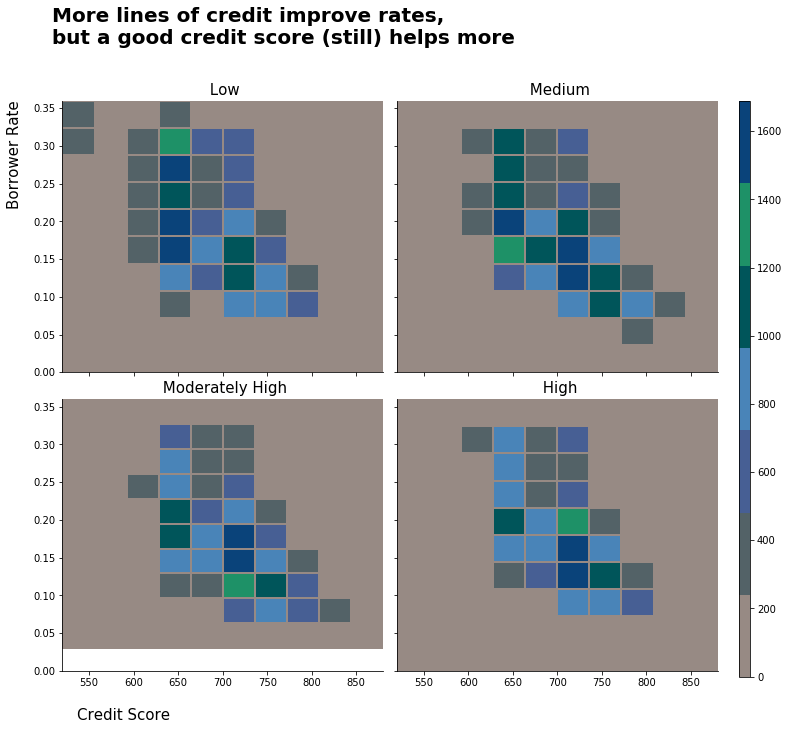

In [142]:
# set order
credit_bin_names = ['Low', 'Medium', 'Moderately High', 'High']

# plot
ax = sns.FacetGrid(data = borrower, col = 'CreditLineBins', col_wrap = 2, size = 5,
                margin_titles = True, col_order = credit_bin_names)
ax.map(plt.hist2d, 'CreditScoreRangeLower', 'BorrowerRate', cmap = my_cmap);

# set plot attributes 
plt.subplots_adjust(top=.85)
ax.fig.suptitle("More lines of credit improve rates,\n%s" % "\n".join(wrap("but a good credit score still helps more",
                                                                               width=60)), 
                fontsize = 20, horizontalalignment = 'left', weight = 'bold', x=.06) 

for a in ax.axes.flat:
    a.set_xlabel("")
    a.set_ylabel("")
    if a.get_title():
        a.set_title(a.get_title().split('=')[1],
                     fontsize='15')
    
plt.ylabel("Borrower Rate", fontsize = 15, verticalalignment = 'top', y = 1.9, labelpad = 390)
plt.xlabel("Credit Score", fontsize = 15, horizontalalignment = 'left', x=-1, labelpad = 20)
    
cbar_ax = ax.fig.add_axes([1.015, 0.05, 0.015, 0.8])
plt.colorbar(cax=cbar_ax);